<html>
    <body>
        <h1 class="alert alert-info" style="text-align: center;">NYC Taxi Trip Duration: A Machine Learning Approach to Predicting Duration of a New York taxi trip</h1>
        <h2 id="contents">Table of Contents</h2>
        <ol>
            <a href="#section1"><li>Importing libraries and loading the dataset</li></a>
            <a href="#section2"><li>Exploring the dataset</li></a>
            <a href="#section3"><li>Data cleaning</li></a>
            <a href="#section4"><li>Exploratory data analysis</li></a>
            <ol>
                <a href="#sub_section1_1"><li type="i">Univariate analysis</li></a>
                <a href="#sub_section1_2"><li type="i">Bivariate analysis</li></a>
            </ol>        
            <a href="#section5"><li>Data Prepocessing</li></a>
            <a href="#section6"><li>Model Building and Evaluation</li></a>
            <ol>
                <a href="#sub_section2_1"><li type="i">Ridge Regrassion</li></a>
            </ol> 
        </ol>
    </body>
</html>

<div class="col-md-8">
    <h2 id="section1">1. Importing libraries and loading the dataset</h2>
    <p>Let's start by importing the necessary libraries and loading the dataset.</p>
</div>
<div class="col-md-4">
    <a href="#contents">Back to top</h2>
</div>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate
import warnings
import os
import matplotlib as mpl

mpl.rcParams['agg.path.chunksize'] = 10000

color = sns.color_palette()

%matplotlib inline

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999

warnings.filterwarnings(action = 'ignore')

In [2]:
# Read the data
df_train = pd.read_csv('../input/nyc-taxi-trip-duration/train.csv')
df_test = pd.read_csv('../input/nyc-taxi-trip-duration/test.csv')
df_sample = pd.read_csv('../input/nyc-taxi-trip-duration/sample_submission.csv')

<div class="col-md-8">
    <h2 id="section2">2. Exploring the dataset</h2>
    <p>Let's explore the datasets:</p>
</div>
<div class="col-md-4">
    <a href="#contens">Back to top</h2>
</div>

In [3]:
# Shape of the data
print('Shape of the train data: %s', df_train.shape)
print('Shape of the test data: %s', df_test.shape)

Shape of the train data: %s (1458644, 11)
Shape of the test data: %s (625134, 9)


In [4]:
# Sample train data
df_train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [5]:
# Sample train data
df_test.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N


<p>Let's explore the dataset to get a better understanding of its structure and content:</p>

In [6]:
# Train data information
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [7]:
# Test data information
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625134 entries, 0 to 625133
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  625134 non-null  object 
 1   vendor_id           625134 non-null  int64  
 2   pickup_datetime     625134 non-null  object 
 3   passenger_count     625134 non-null  int64  
 4   pickup_longitude    625134 non-null  float64
 5   pickup_latitude     625134 non-null  float64
 6   dropoff_longitude   625134 non-null  float64
 7   dropoff_latitude    625134 non-null  float64
 8   store_and_fwd_flag  625134 non-null  object 
dtypes: float64(4), int64(2), object(3)
memory usage: 42.9+ MB


In [8]:
# Summary statistics
df_train.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [9]:
# Unique values in each column
df_train.nunique()

id                    1458644
vendor_id                   2
pickup_datetime       1380222
dropoff_datetime      1380377
passenger_count            10
pickup_longitude        23047
pickup_latitude         45245
dropoff_longitude       33821
dropoff_latitude        62519
store_and_fwd_flag          2
trip_duration            7417
dtype: int64

<div class="col-md-8">
    <h3 id="section3">3. Data cleaning</h3>
    <p>Nice! We have a dataset with <b>729322</b> rows and <b>11</b> columns. Let's clean the dataset by handling missing values, duplicates, irrelevant columns, and converting data types.</p>
</div>
<div class="col-md-4">
    <a href="#contents">Back to top</h2>
</div>

In [170]:
# Let's create a copy of the train and test data to perform data cleaning
df_nyc_copy = df_train.copy()
df_nyc_test_copy = df_test.copy()

In [171]:
# Missing values in train data
df_nyc_copy.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

<p>Great! No missing values. Let's jump to the next step</p>

In [172]:
# Check for duplicates in train data
df_nyc_copy.duplicated().sum()

0

In [173]:
# Check for duplicates in test data
df_nyc_test_copy.duplicated().sum()

0

<p>No duplicates in the dataset! Let's move on to the next step.</p>

<p>Let's convert pickup_datetime & dropoff_datetime to a datetime and convert vendor_id, passenger_count, store_and_fwd_flag to categorical variables.</p>

In [174]:
df_nyc_copy['pickup_datetime'] = pd.to_datetime(df_nyc_copy['pickup_datetime'])
df_nyc_copy['dropoff_datetime'] = pd.to_datetime(df_nyc_copy['dropoff_datetime'])

df_nyc_copy['vendor_id'] = df_nyc_copy['vendor_id'].astype('category')
df_nyc_copy['passenger_count'] = df_nyc_copy['passenger_count'].astype('category')
df_nyc_copy['store_and_fwd_flag'] = df_nyc_copy['store_and_fwd_flag'].astype('category')

df_nyc_test_copy['pickup_datetime'] = pd.to_datetime(df_nyc_test_copy['pickup_datetime'])

df_nyc_test_copy['vendor_id'] = df_nyc_test_copy['vendor_id'].astype('category')
df_nyc_test_copy['passenger_count'] = df_nyc_test_copy['passenger_count'].astype('category')
df_nyc_test_copy['store_and_fwd_flag'] = df_nyc_test_copy['store_and_fwd_flag'].astype('category')

<div class="col-md-8">
    <h3 id="section4">4. Exploratory data analysis</h3>
    <p>Let's perform exploratory data analysis to extract insights from the cab trips dataset:</p>
    <h4 id="sub_section1_1" >i. Univariate analysis</h4>
    <p>We will start by exploring the distribution of the numerical and categorical variables in the dataset:</p>
</div>
<div class="col-md-4">
    <a href="#contents">Back to top</h2>
</div>

In [175]:
# Function for calculating descriptives of numeric variable and plotting the distribution
def plot_dist(df, col, x_label, y_label, plot_title):
    _min = df[col].min()
    _max = df[col].max()
    ran = df[col].max()-df[col].min()
    mean = df[col].mean()
    median = df[col].median()
    st_dev = df[col].std()
    skew = df[col].skew()
    kurt = df[col].kurtosis()

    # calculating points of standard deviation
    points = mean-st_dev, mean+st_dev
    sns.set_style('darkgrid')
    plt.figure(figsize=(12,8))
    sns.histplot(data=df, x=col, bins=30, kde=True, color='dodgerblue')
    sns.lineplot(x=points, y=[0,0], color = 'black', label = "std_dev")
    sns.scatterplot(x=[_min,_max], y=[0,0], color = 'orange', label = "min/max")
    sns.scatterplot(x=[mean], y=[0], color = 'red', label = "mean")
    sns.scatterplot(x=[median], y=[0], color = 'blue', label = "median")
    plt.title(plot_title, fontsize=14)
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=12)

    # Creating a DataFrame for the descriptive statistics
    variable_stats = pd.DataFrame({'Statistics': ['Minimum Value', 'Maximum Value', 'Range', 'Mean', 
                                                    'Median', 'Standard Deviation', 'Skewness', 'Kurtosis'], 
                                        'Value': [_min, _max, ran, mean, median, st_dev, skew, kurt]})
    
    plt.show()

    display(tabulate(variable_stats, headers='keys', showindex=False, tablefmt='html'))


In [176]:
# Function for plolting the distribution of categorical variables
def plot_cat(df, col, x_label, y_label, plot_title):
    sns.set_style('darkgrid')
    plt.figure(figsize=(12,8))
    sns.countplot(data=df, x=col, color='dodgerblue')
    plt.title(plot_title, fontsize=14)
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    plt.show()

<p>Here trip_duration column is our target variable. Let's explore its distribution.</p>

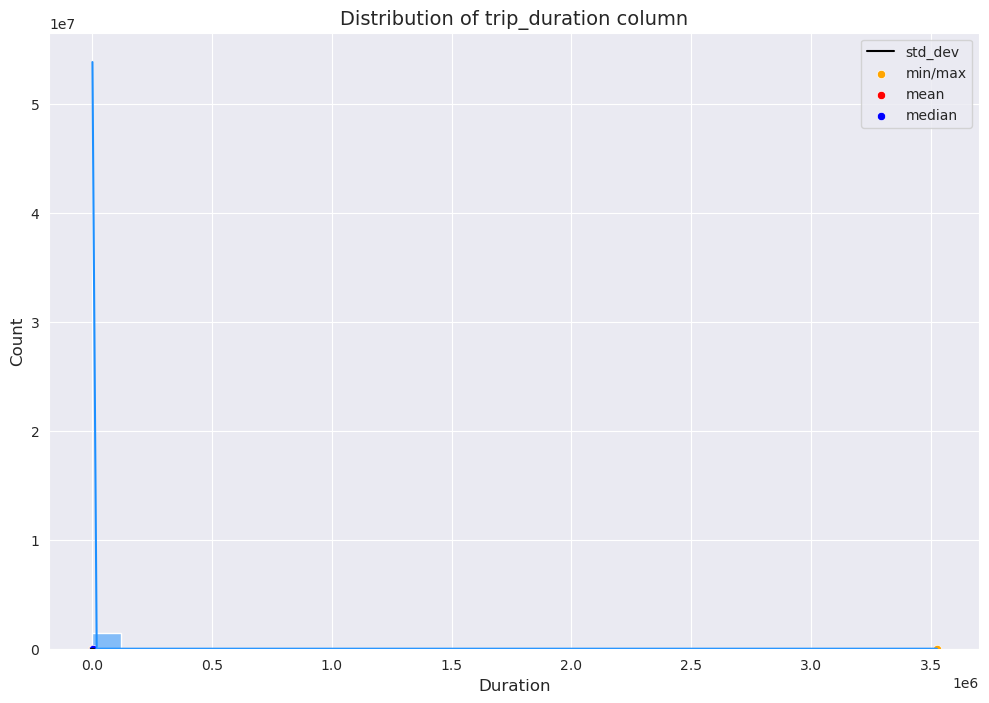

Statistics,Value
Minimum Value,1
Maximum Value,3.52628e+06
Range,3.52628e+06
Mean,959.492
Median,662
Standard Deviation,5237.43
Skewness,343.164
Kurtosis,192132


In [177]:
# Plot distribution of Duration Column
plot_dist(df_nyc_copy, 'trip_duration', 'Duration', 'Count', 'Distribution of trip_duration column')

<p>Kurtosis of trip_duration is very high. So Fare is highly skewed to the right side.</p>
<p>Which is as expected, because some long trips.</p>
<p>Minimum trip duration is 1 second, which seems to be incorrect or some trip got canceled, we need to expolre this futher.</p>

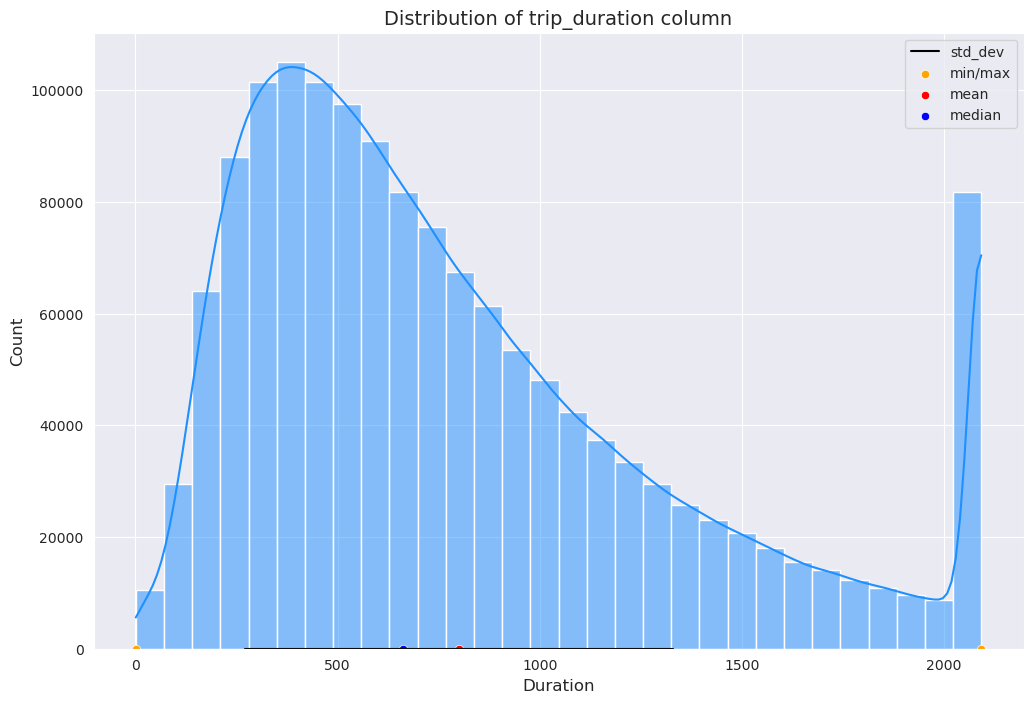

Statistics,Value
Minimum Value,1
Maximum Value,2092
Range,2091
Mean,800.918
Median,662
Standard Deviation,529.1
Skewness,0.96639
Kurtosis,0.143604


In [178]:
# Let's impute the outliers with whiskers value and check the distribution again
# Calculate the IQR of the trip_duration column
Q1 = df_nyc_copy['trip_duration'].quantile(0.25)
Q3 = df_nyc_copy['trip_duration'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper whiskers
lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR

# Replace outliers with whisker values
df_nyc_copy['trip_duration'] = df_nyc_copy['trip_duration'].apply(lambda x: lower_whisker if x < lower_whisker else (upper_whisker if x > upper_whisker else x))

# Plot distribution of Duration Column
plot_dist(df_nyc_copy, 'trip_duration', 'Duration', 'Count', 'Distribution of trip_duration column')

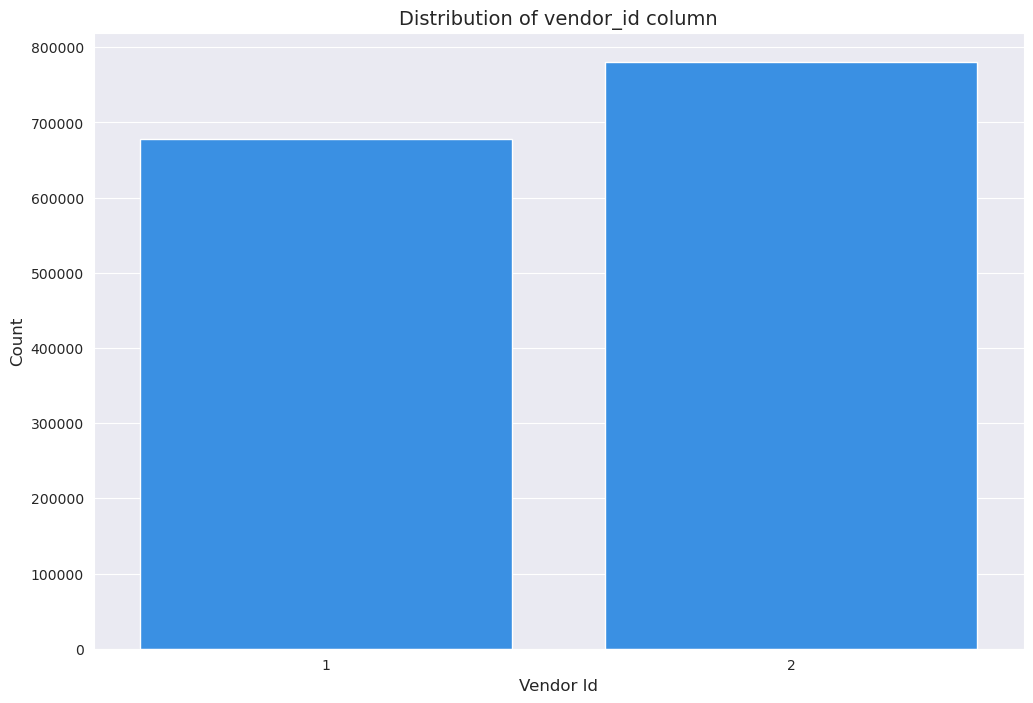

In [179]:
# Plotting distribution of  column
plot_cat(df_nyc_copy, 'vendor_id', 'Vendor Id', 'Count', 'Distribution of vendor_id column')

<p>Vendor Id has a good mix of values</p>

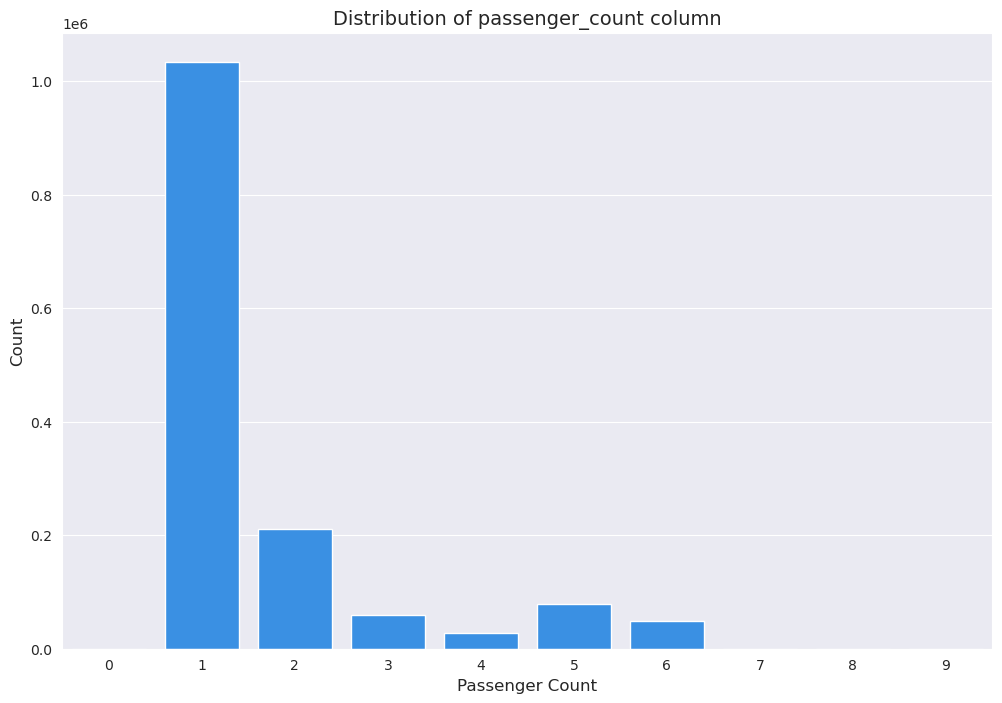

In [180]:
# Plottting distribution of Paasenger Count column
plot_cat(df_nyc_copy, 'passenger_count', 'Passenger Count', 'Count', 'Distribution of passenger_count column')

<p>Single passenger is most frequent</p>
<p>There are some records with 0 passengers. Let's drop these</p>

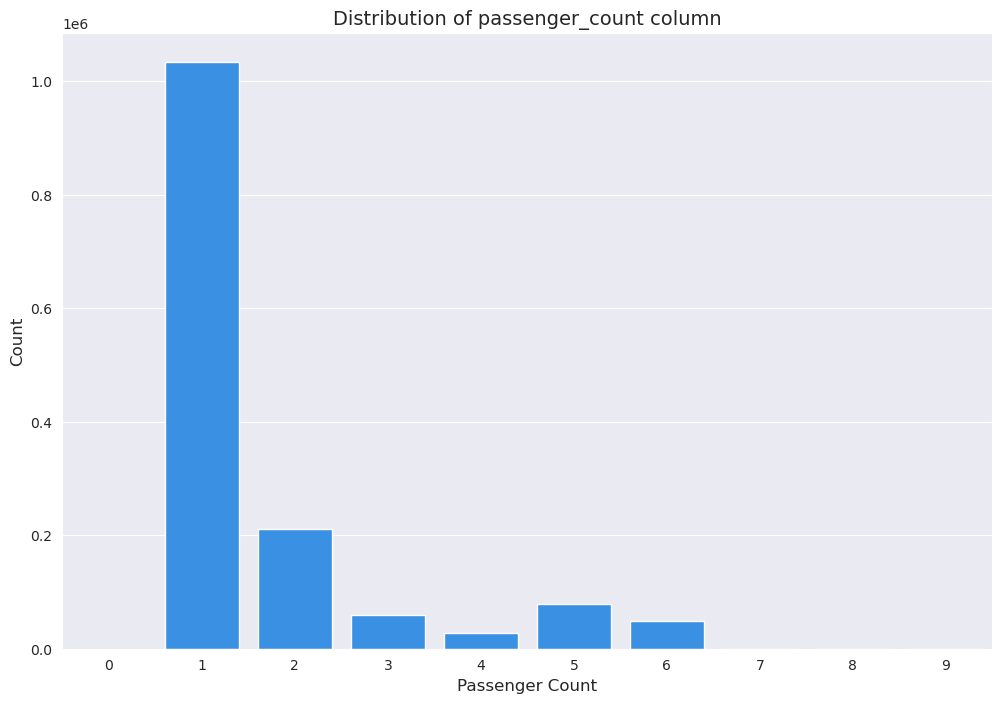

In [193]:
# Drop records with passenger count = 0
df_nyc_copy = df_nyc_copy[df_nyc_copy.passenger_count.astype('int') > 0]

# Plottting distribution of Paasenger Count column
plot_cat(df_nyc_copy, 'passenger_count', 'Passenger Count', 'Count', 'Distribution of passenger_count column')

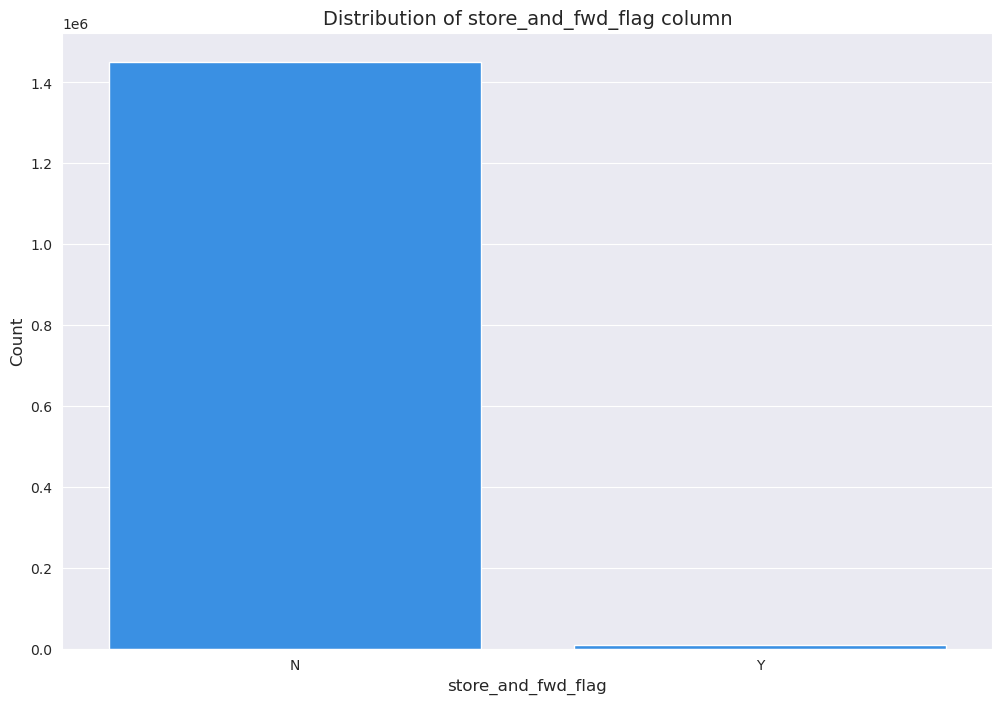

In [194]:
# Plottting distribution of Parch column
plot_cat(df_nyc_copy, 'store_and_fwd_flag', 'store_and_fwd_flag', 'Count', 'Distribution of store_and_fwd_flag column')

<p>For most of the trips store_and_fwd_flag in N</p>

<p>pickup/dropoff_datetime do not provide much information on its own, let's createtwo new variables from these pickup/dropoff day of week and month of year</p>

In [195]:
df_nyc_copy['pickup_day_of_week'] = df_nyc_copy.pickup_datetime.dt.day_name()
df_nyc_copy['pickup_month_of_year'] = df_nyc_copy.pickup_datetime.dt.month_name()
df_nyc_copy['pickup_time_hr'] = df_nyc_copy.pickup_datetime.dt.hour
df_nyc_copy['pickup_time_min'] = df_nyc_copy.pickup_datetime.dt.minute
df_nyc_copy['dropoff_day_of_week'] = df_nyc_copy.dropoff_datetime.dt.day_name()
df_nyc_copy['dropoff_month_of_year'] = df_nyc_copy.dropoff_datetime.dt.month_name()
df_nyc_copy['dropoff_time_hr'] = df_nyc_copy.dropoff_datetime.dt.hour
df_nyc_copy['dropoff_time_min'] = df_nyc_copy.dropoff_datetime.dt.minute
df_nyc_copy.drop(columns=['dropoff_datetime', 'pickup_datetime'], inplace=True)
df_nyc_copy.head()

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day_of_week,pickup_month_of_year,pickup_time_hr,pickup_time_min,dropoff_day_of_week,dropoff_month_of_year,dropoff_time_hr,dropoff_time_min
0,id2875421,2,1,-74,41,-74,41,N,4.6e+02,Monday,March,17,24,Monday,March,17,32
1,id2377394,1,1,-74,41,-74,41,N,6.6e+02,Sunday,June,0,43,Sunday,June,0,54
2,id3858529,2,1,-74,41,-74,41,N,2.1e+03,Tuesday,January,11,35,Tuesday,January,12,10
3,id3504673,2,1,-74,41,-74,41,N,4.3e+02,Wednesday,April,19,32,Wednesday,April,19,39
4,id2181028,2,1,-74,41,-74,41,N,4.4e+02,Saturday,March,13,30,Saturday,March,13,38


In [196]:
df_nyc_test_copy['pickup_day_of_week'] = df_nyc_test_copy.pickup_datetime.dt.day_name()
df_nyc_test_copy['pickup_month_of_year'] = df_nyc_test_copy.pickup_datetime.dt.month_name()
df_nyc_test_copy['pickup_time_hr'] = df_nyc_test_copy.pickup_datetime.dt.hour
df_nyc_test_copy['pickup_time_min'] = df_nyc_test_copy.pickup_datetime.dt.minute
df_nyc_test_copy.drop(columns=['pickup_datetime'], inplace=True)
df_nyc_test_copy.head()

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pickup_day_of_week,pickup_month_of_year,pickup_time_hr,pickup_time_min
0,id3004672,1,1,-74,41,-74,41,N,Thursday,June,23,59
1,id3505355,1,1,-74,41,-74,41,N,Thursday,June,23,59
2,id1217141,1,1,-74,41,-74,41,N,Thursday,June,23,59
3,id2150126,2,1,-74,41,-74,41,N,Thursday,June,23,59
4,id1598245,1,1,-74,41,-74,41,N,Thursday,June,23,59


In [197]:
# Let's see if there is any instance where pickup and drop are different
print(df_nyc_copy[df_nyc_copy.pickup_month_of_year != df_nyc_copy.dropoff_month_of_year].shape)
print(df_nyc_copy[df_nyc_copy.pickup_day_of_week != df_nyc_copy.dropoff_day_of_week].shape)

(526, 17)
(16509, 17)


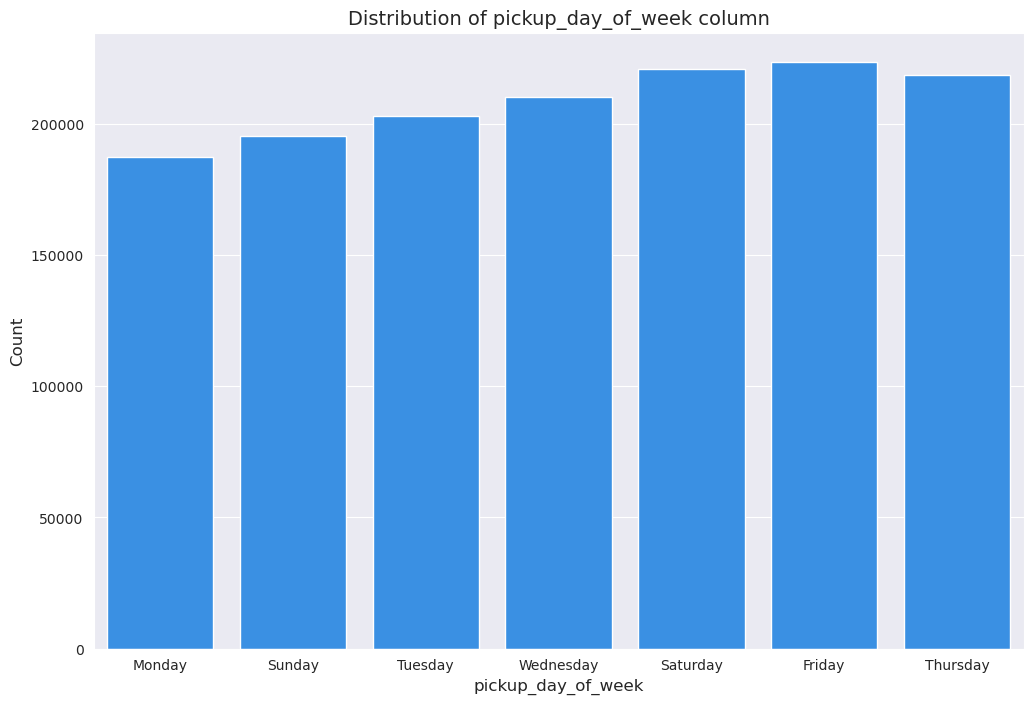

In [198]:
# Plottting distribution of Parch column
plot_cat(df_nyc_copy, 'pickup_day_of_week', 'pickup_day_of_week', 'Count', 'Distribution of pickup_day_of_week column')

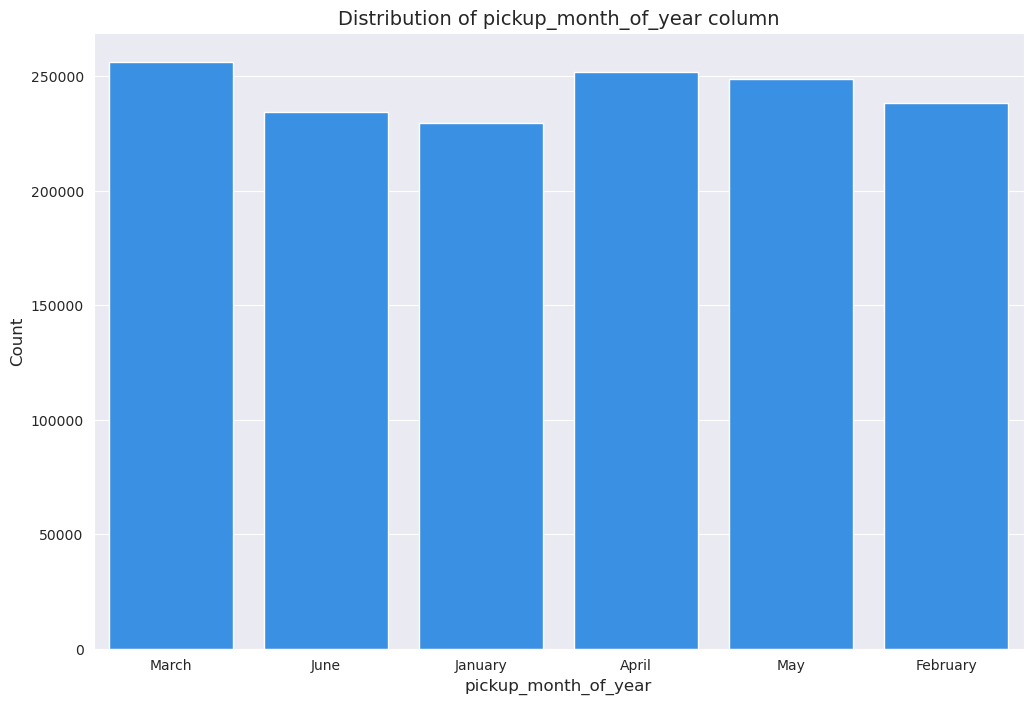

In [199]:
# Plottting distribution of Parch column
plot_cat(df_nyc_copy, 'pickup_month_of_year', 'pickup_month_of_year', 'Count', 'Distribution of pickup_month_of_year column')

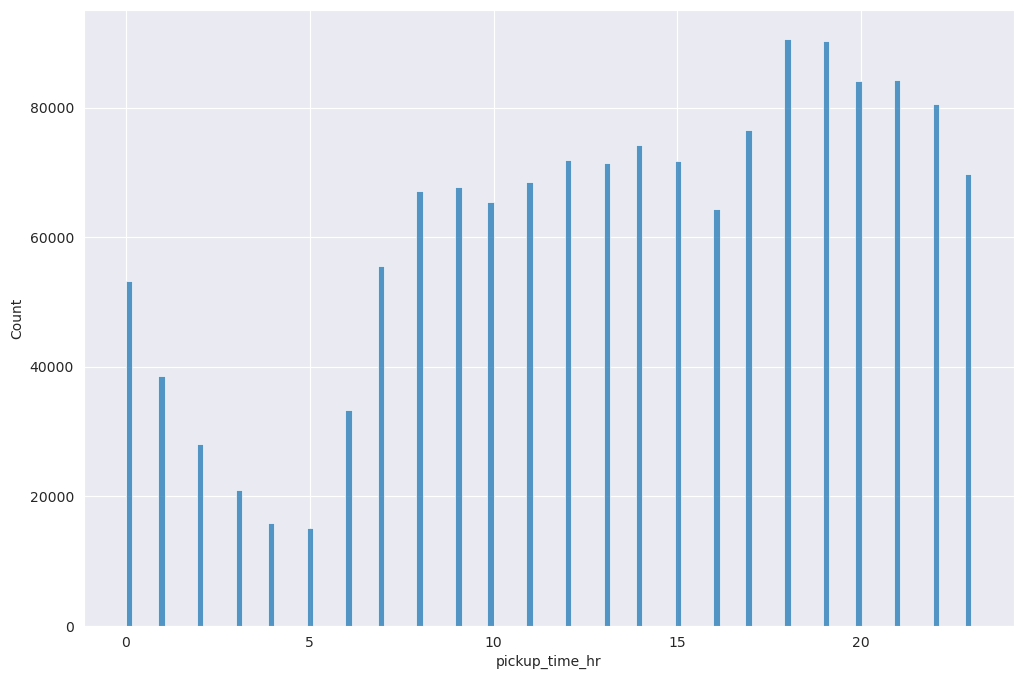

In [200]:
# Plotting distribution of pickup_time_hr
plt.figure(figsize=(12,8))
sns.histplot(df_nyc_copy.pickup_time_hr)
plt.show()

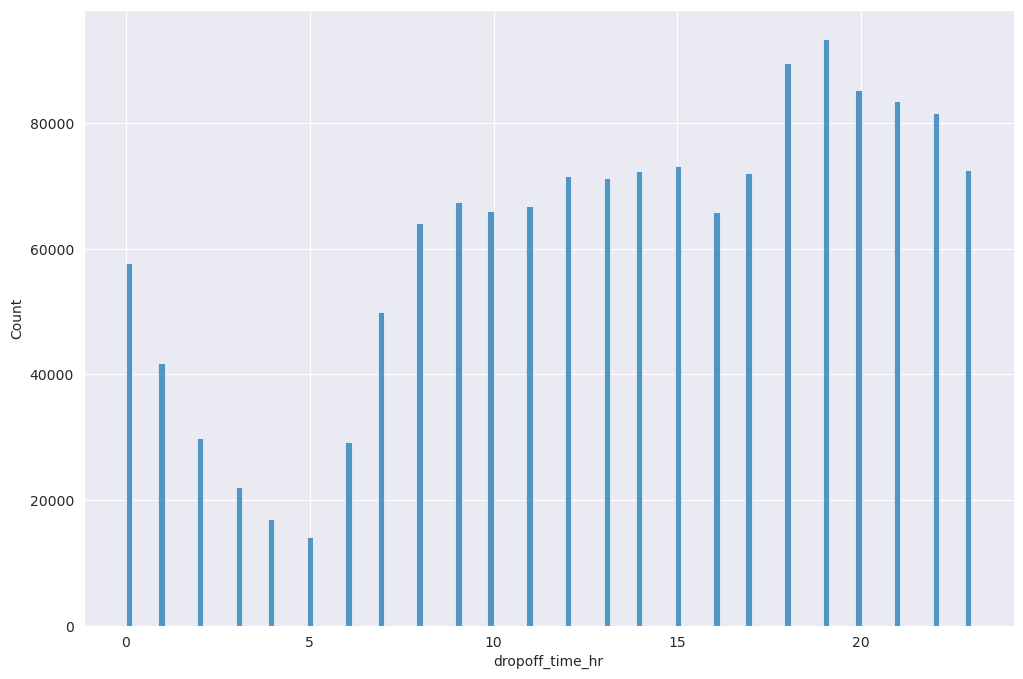

In [201]:
# Plotting distribution of dropoff_time_hr
plt.figure(figsize=(12,8))
sns.histplot(df_nyc_copy.dropoff_time_hr)
plt.show()

<p>Similar to datetime columns lattitude and longitude columns will also not provide much information on thier own, let's create a new column called <b>distanse</b> which is the distance between the pickup and dropoff locations. We will use the <b>haversine's formula</b>.</p>

In [202]:
# Function to calculate the distance between two pairs of latitude and longitude values
def haversine(lat1, lon1, lat2, lon2):
    r = 6371  # Earth radius in kilometers

    phi1 = np.radians(lat1)
    phi2 = np.radians(lat2)
    delta_phi = np.radians(lat2 - lat1)
    delta_lambda = np.radians(lon2 - lon1)

    a = np.sin(delta_phi / 2)**2 + \
        np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    return r * c

In [203]:
# apply the function to each row in the Train DataFrame and create a new column with the results
df_nyc_copy['distance'] = df_nyc_copy.apply(lambda row: haversine(row['pickup_latitude'],
                                                     row['pickup_longitude'],
                                                     row['dropoff_latitude'],
                                                     row['dropoff_longitude']), axis=1)

In [204]:
# df_nyc_copy.drop(columns=['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude'], inplace=True)
df_nyc_copy.head()

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day_of_week,pickup_month_of_year,pickup_time_hr,pickup_time_min,dropoff_day_of_week,dropoff_month_of_year,dropoff_time_hr,dropoff_time_min,distance
0,id2875421,2,1,-74,41,-74,41,N,4.6e+02,Monday,March,17,24,Monday,March,17,32,1.5
1,id2377394,1,1,-74,41,-74,41,N,6.6e+02,Sunday,June,0,43,Sunday,June,0,54,1.8
2,id3858529,2,1,-74,41,-74,41,N,2.1e+03,Tuesday,January,11,35,Tuesday,January,12,10,6.4
3,id3504673,2,1,-74,41,-74,41,N,4.3e+02,Wednesday,April,19,32,Wednesday,April,19,39,1.5
4,id2181028,2,1,-74,41,-74,41,N,4.4e+02,Saturday,March,13,30,Saturday,March,13,38,1.2


In [205]:
# apply the function to each row in the Test DataFrame and create a new column with the results
df_nyc_test_copy['distance'] = df_nyc_test_copy.apply(lambda row: haversine(row['pickup_latitude'],
                                                     row['pickup_longitude'],
                                                     row['dropoff_latitude'],
                                                     row['dropoff_longitude']), axis=1)

In [206]:
# df_nyc_test_copy.drop(columns=['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude'], inplace=True)
df_nyc_test_copy.head()

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pickup_day_of_week,pickup_month_of_year,pickup_time_hr,pickup_time_min,distance
0,id3004672,1,1,-74,41,-74,41,N,Thursday,June,23,59,2.7
1,id3505355,1,1,-74,41,-74,41,N,Thursday,June,23,59,2.8
2,id1217141,1,1,-74,41,-74,41,N,Thursday,June,23,59,1.3
3,id2150126,2,1,-74,41,-74,41,N,Thursday,June,23,59,5.3
4,id1598245,1,1,-74,41,-74,41,N,Thursday,June,23,59,0.96


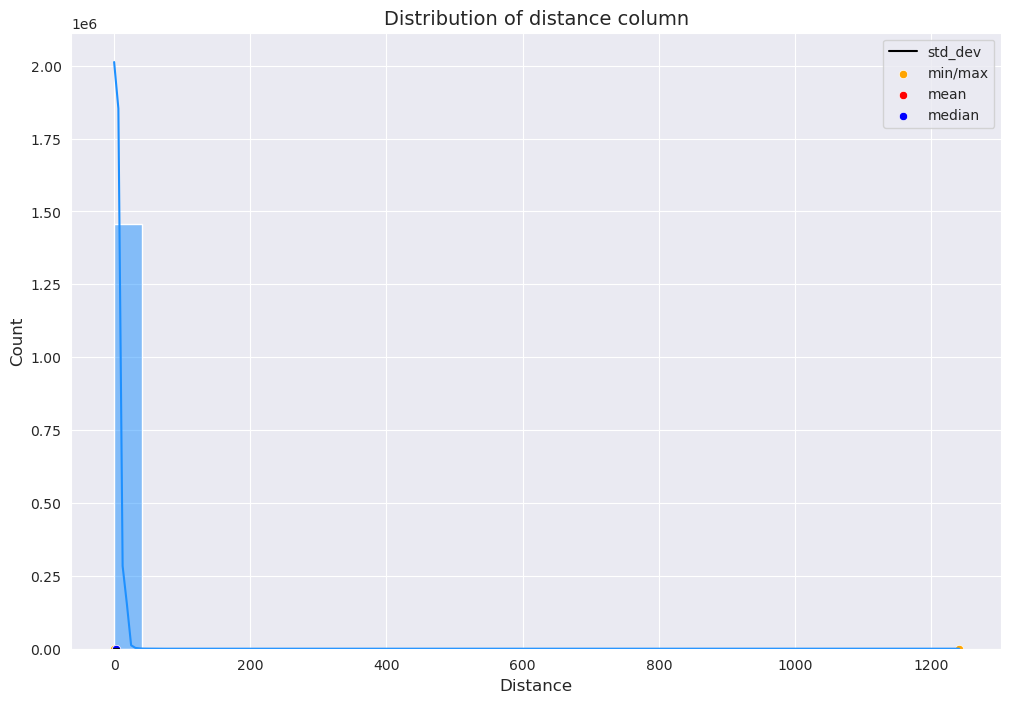

Statistics,Value
Minimum Value,0
Maximum Value,1240.91
Range,1240.91
Mean,3.44095
Median,2.09378
Standard Deviation,4.29655
Skewness,32.6321
Kurtosis,6922.11


In [207]:
# Let's see the distribution of distance variable
plot_dist(df_nyc_copy, 'distance', 'Distance', 'Count', 'Distribution of distance column')

<p>Distance is highly skewd towards right end, which is expected as we have some very high trip durations</p>

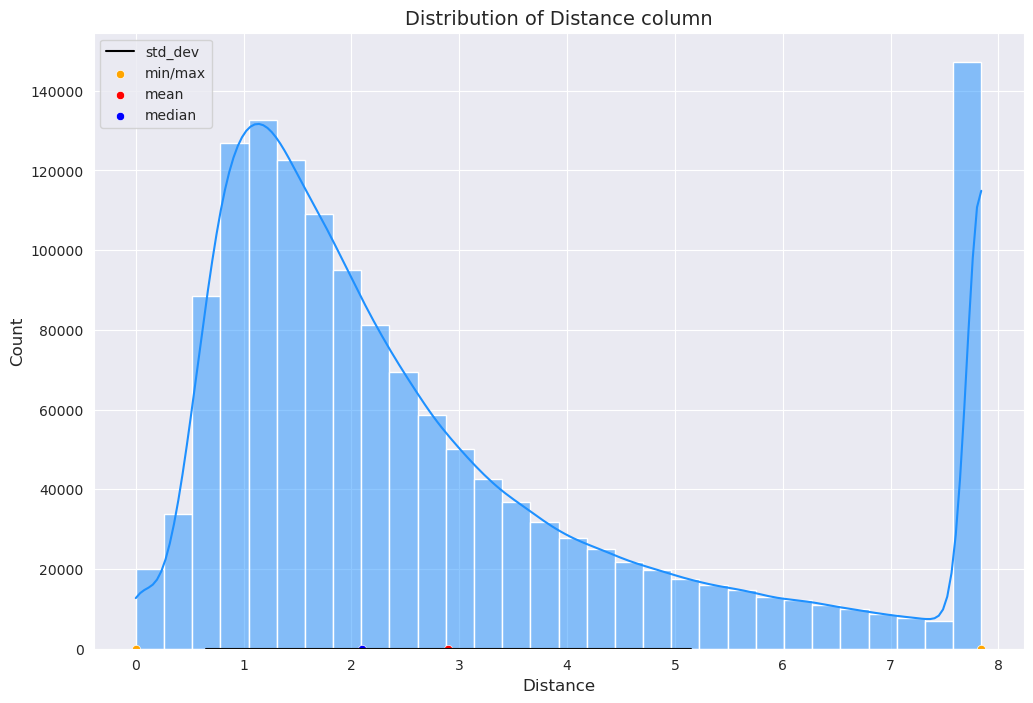

Statistics,Value
Minimum Value,0
Maximum Value,7.84075
Range,7.84075
Mean,2.89992
Median,2.09378
Standard Deviation,2.24549
Skewness,1.09482
Kurtosis,0.0347781


In [208]:
# Let's impute the outliers with whiskers value and check the distribution again
# Calculate the IQR of the trip_duration column
Q1 = df_nyc_copy['distance'].quantile(0.25)
Q3 = df_nyc_copy['distance'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper whiskers
lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR

# Replace outliers with whisker values
df_nyc_copy['distance'] = df_nyc_copy['distance'].apply(lambda x: lower_whisker if x < lower_whisker else (upper_whisker if x > upper_whisker else x))

# Plot distribution of Duration Column
plot_dist(df_nyc_copy, 'distance', 'Distance', 'Count', 'Distribution of Distance column')

<div class="col-md-8">
    <h4 id="sub_section1_2">ii. Bivariate analysis</h4>
    <p>Let's explore the relationship between the trip duration and other variables in the dataset:</p>
</div>
<div class="col-md-4">
    <a href="#contents">Back to top</h2>
</div>

In [209]:
# Function for plotting the distribution of numeric variables against the target variable
# Here target variable is assumed to be categorical
def plot_num_vs_target(df, col, target, x_label, y_label, plot_title):
    sns.set_style('darkgrid')
    plt.figure(figsize=(12,8))
    sns.scatterplot(data=df, x=target, y=col, color='dodgerblue')
    plt.title(plot_title, fontsize=14)
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    plt.show()

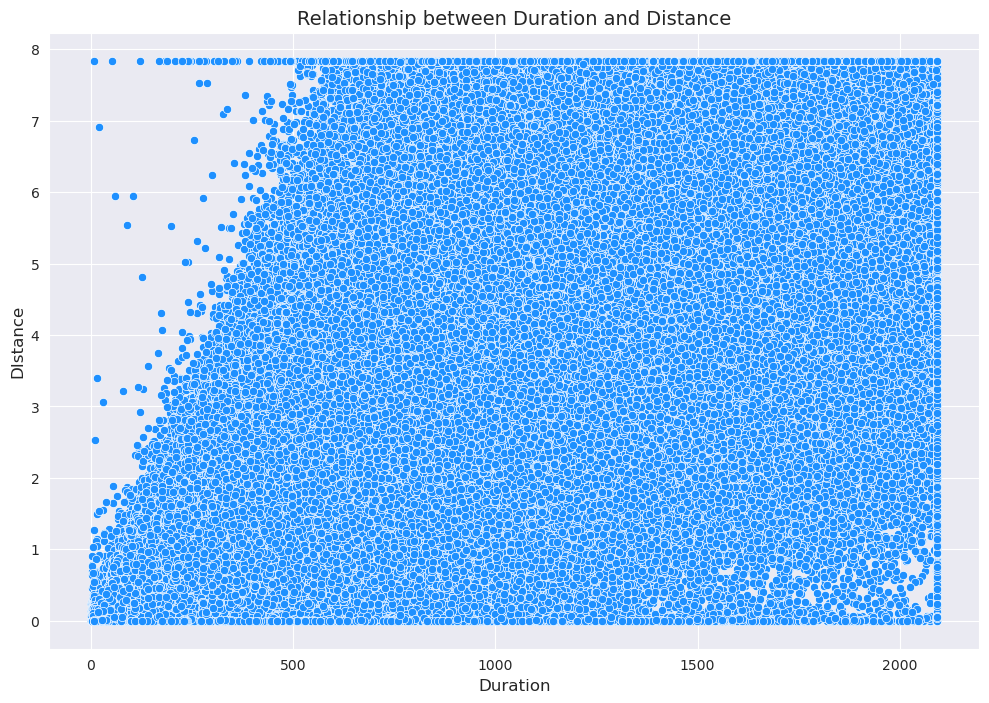

In [210]:
# Relationship between trip_duration and distance
plot_num_vs_target(df_nyc_copy, 'distance', 'trip_duration', 'Duration', 'DIstance', 'Relationship between Duration and Distance')

In [211]:
# Function for plotting the distribution of categorical variables against the target variable
def plot_cat_vs_target(df, col, target, x_label, y_label, plot_title):
    sns.set_style('darkgrid')
    plt.figure(figsize=(12,8))
    sns.boxplot(data=df, x=col, y=target, palette='Set1')
    plt.title(plot_title, fontsize=14)
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    plt.show()

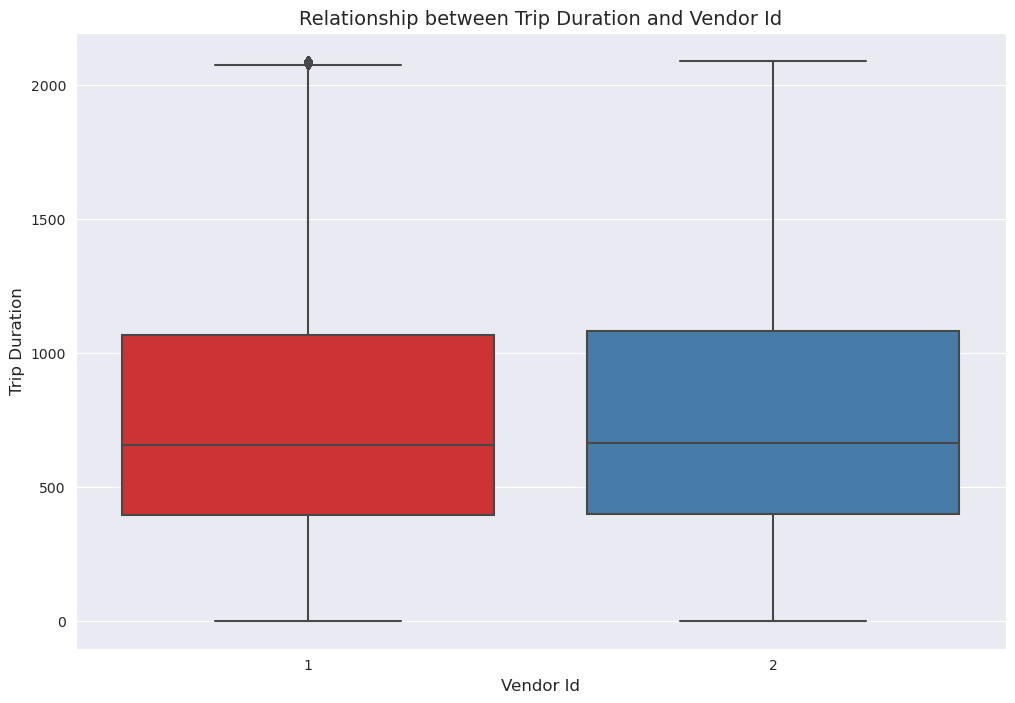

In [212]:
# Relationship between trip_duration and vendor_id
plot_cat_vs_target(df_nyc_copy, 'vendor_id', 'trip_duration', 'Vendor Id', 'Trip Duration', 'Relationship between Trip Duration and Vendor Id')

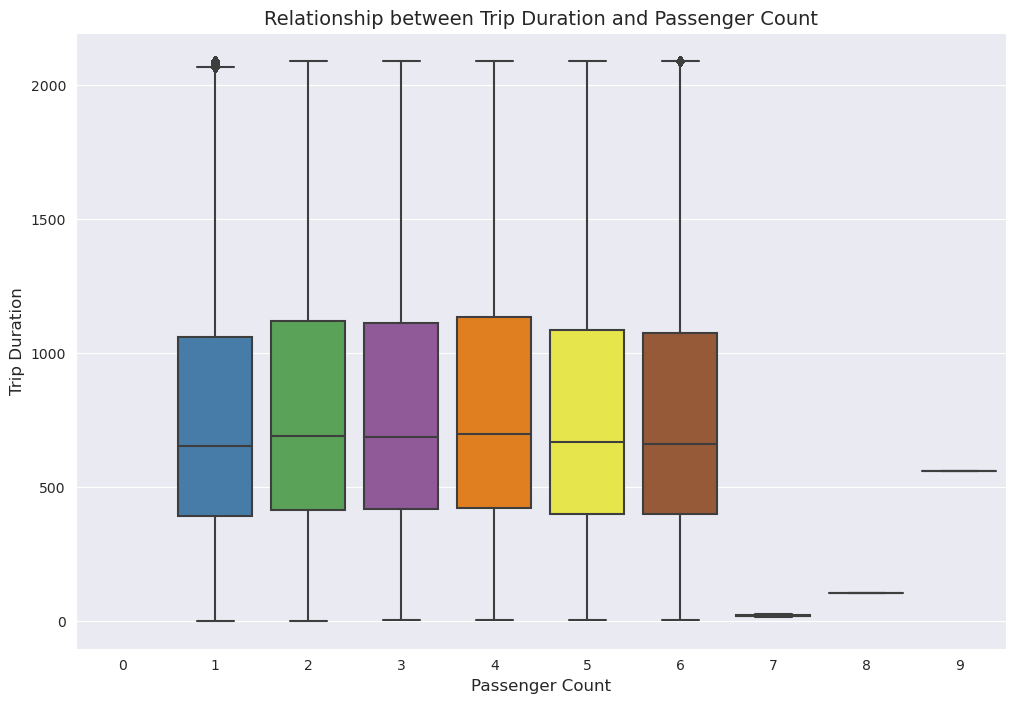

In [213]:
# Relationship between trip_duration and passenger_count
plot_cat_vs_target(df_nyc_copy, 'passenger_count', 'trip_duration', 'Passenger Count', 'Trip Duration', 'Relationship between Trip Duration and Passenger Count')

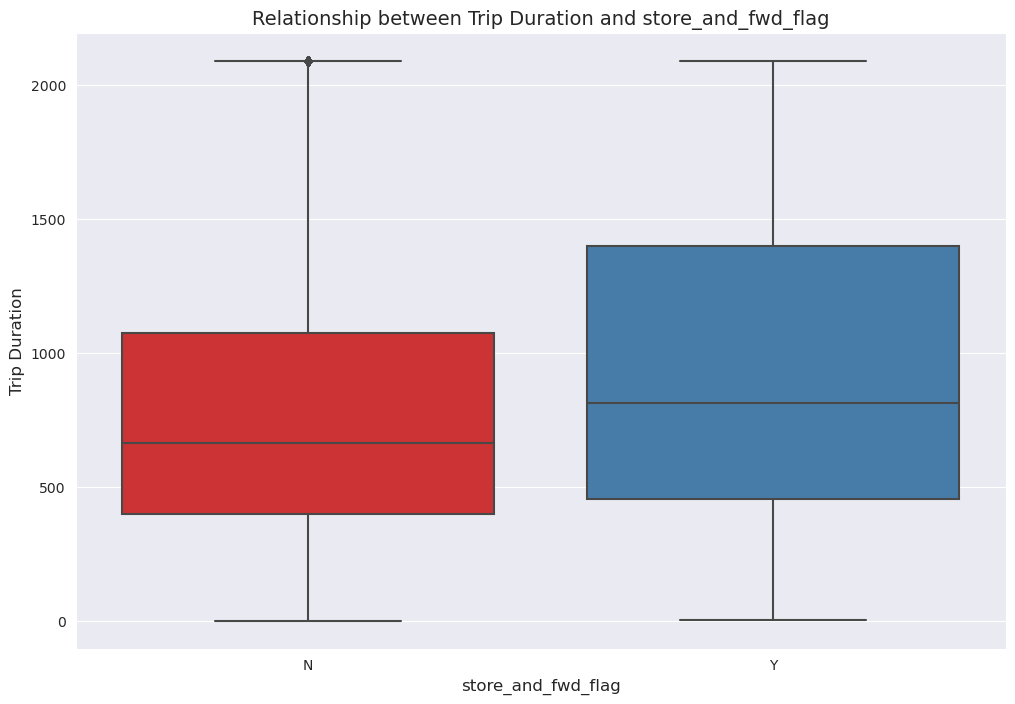

In [214]:
# Relationship between trip_duration and passenger_count
plot_cat_vs_target(df_nyc_copy, 'store_and_fwd_flag', 'trip_duration', 'store_and_fwd_flag', 'Trip Duration', 'Relationship between Trip Duration and store_and_fwd_flag')

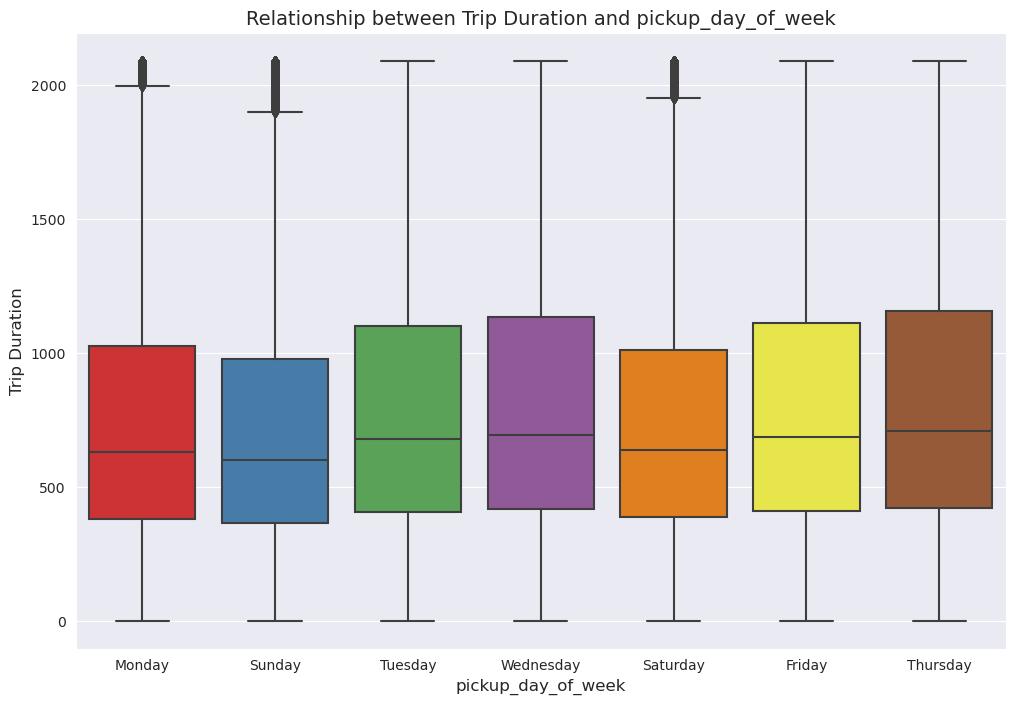

In [215]:
# Relationship between trip_duration and passenger_count
plot_cat_vs_target(df_nyc_copy, 'pickup_day_of_week', 'trip_duration', 'pickup_day_of_week', 'Trip Duration', 'Relationship between Trip Duration and pickup_day_of_week')

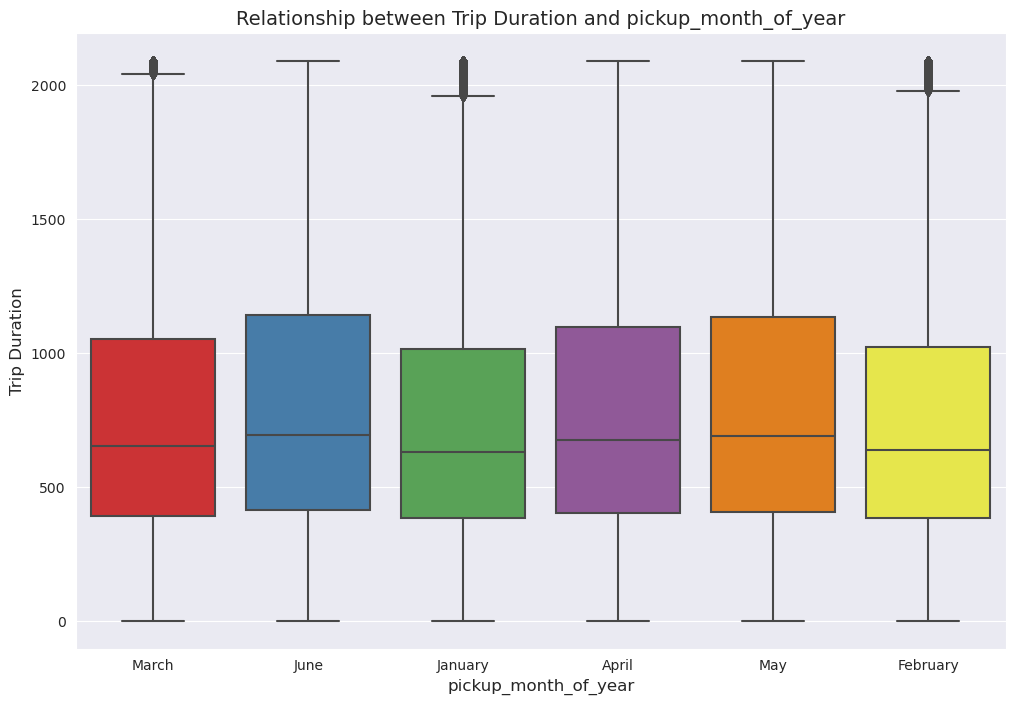

In [216]:
# Relationship between trip_duration and passenger_count
plot_cat_vs_target(df_nyc_copy, 'pickup_month_of_year', 'trip_duration', 'pickup_month_of_year', 'Trip Duration', 'Relationship between Trip Duration and pickup_month_of_year')

<div class="col-md-8">
    <h3 id="section5">5. Data Preprocessing</h3>
    <p>Before we use variables in our model, we need to preprocess them. We will perform the following steps:</p>
    <ul>
        <li>One-hot encode categorical variables</li>
        <li>Lable encode categorical variables</li>
    </ul>
</div>
<div class="col-md-4">
    <a href="#contents">Back to top</h2>
</div>

In [217]:
# Function to encode categorical variables, we will use scikit-learn's LabelEncoder for label encoding and pandas get_dummies for one-hot encoding
from sklearn.preprocessing import LabelEncoder
def encode_cat(df, col, encoding_type):
    if encoding_type == 'label':
        label_encoder = LabelEncoder()
        df[col] = label_encoder.fit_transform(df[col])
    elif encoding_type == 'onehot':
        df = pd.get_dummies(df, columns=[col], prefix=[col])
    return df

In [218]:
# Encoding variables in the train dataset and create a new dataframe called df_train_encoded
df_nyc_encoded = df_nyc_copy.drop(columns=['dropoff_day_of_week', 'dropoff_month_of_year']).copy()
df_nyc_encoded = encode_cat(df_nyc_encoded, 'vendor_id', 'label')
df_nyc_encoded = encode_cat(df_nyc_encoded, 'passenger_count', 'label')
df_nyc_encoded = encode_cat(df_nyc_encoded, 'store_and_fwd_flag', 'label')
df_nyc_encoded = encode_cat(df_nyc_encoded, 'pickup_day_of_week', 'label')
df_nyc_encoded = encode_cat(df_nyc_encoded, 'pickup_month_of_year', 'label')


In [219]:
# Encoding variables in the test dataset and create a new dataframe called df_train_encoded
df_nyc_test_encoded = df_nyc_test_copy.copy()
df_nyc_test_encoded = encode_cat(df_nyc_test_encoded, 'vendor_id', 'label')
df_nyc_test_encoded = encode_cat(df_nyc_test_encoded, 'passenger_count', 'label')
df_nyc_test_encoded = encode_cat(df_nyc_test_encoded, 'store_and_fwd_flag', 'label')
df_nyc_test_encoded = encode_cat(df_nyc_test_encoded, 'pickup_day_of_week', 'label')
df_nyc_test_encoded = encode_cat(df_nyc_test_encoded, 'pickup_month_of_year', 'label')


In [220]:
# Check the processed train set
df_nyc_encoded.head()

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day_of_week,pickup_month_of_year,pickup_time_hr,pickup_time_min,dropoff_time_hr,dropoff_time_min,distance
0,id2875421,1,0,-74,41,-74,41,0,4.6e+02,1,4,17,24,17,32,1.5
1,id2377394,0,0,-74,41,-74,41,0,6.6e+02,3,3,0,43,0,54,1.8
2,id3858529,1,0,-74,41,-74,41,0,2.1e+03,5,2,11,35,12,10,6.4
3,id3504673,1,0,-74,41,-74,41,0,4.3e+02,6,0,19,32,19,39,1.5
4,id2181028,1,0,-74,41,-74,41,0,4.4e+02,2,4,13,30,13,38,1.2


In [221]:
# Check the processed test set
df_nyc_test_encoded.head()

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pickup_day_of_week,pickup_month_of_year,pickup_time_hr,pickup_time_min,distance
0,id3004672,0,1,-74,41,-74,41,0,4,3,23,59,2.7
1,id3505355,0,1,-74,41,-74,41,0,4,3,23,59,2.8
2,id1217141,0,1,-74,41,-74,41,0,4,3,23,59,1.3
3,id2150126,1,1,-74,41,-74,41,0,4,3,23,59,5.3
4,id1598245,0,1,-74,41,-74,41,0,4,3,23,59,0.96


<p>Now that we have preprocessed the variables, let's check the correlation between them:</p>

In [222]:
# Function to plot correlation between variables
def plot_corr(df, size=10):
    corr = df.corr()
#     print(corr)
    fig, ax = plt.subplots(figsize=(size, size))
    sns.heatmap(corr, annot=True, linewidths=.5, ax=ax, cmap='crest')
    plt.show() 

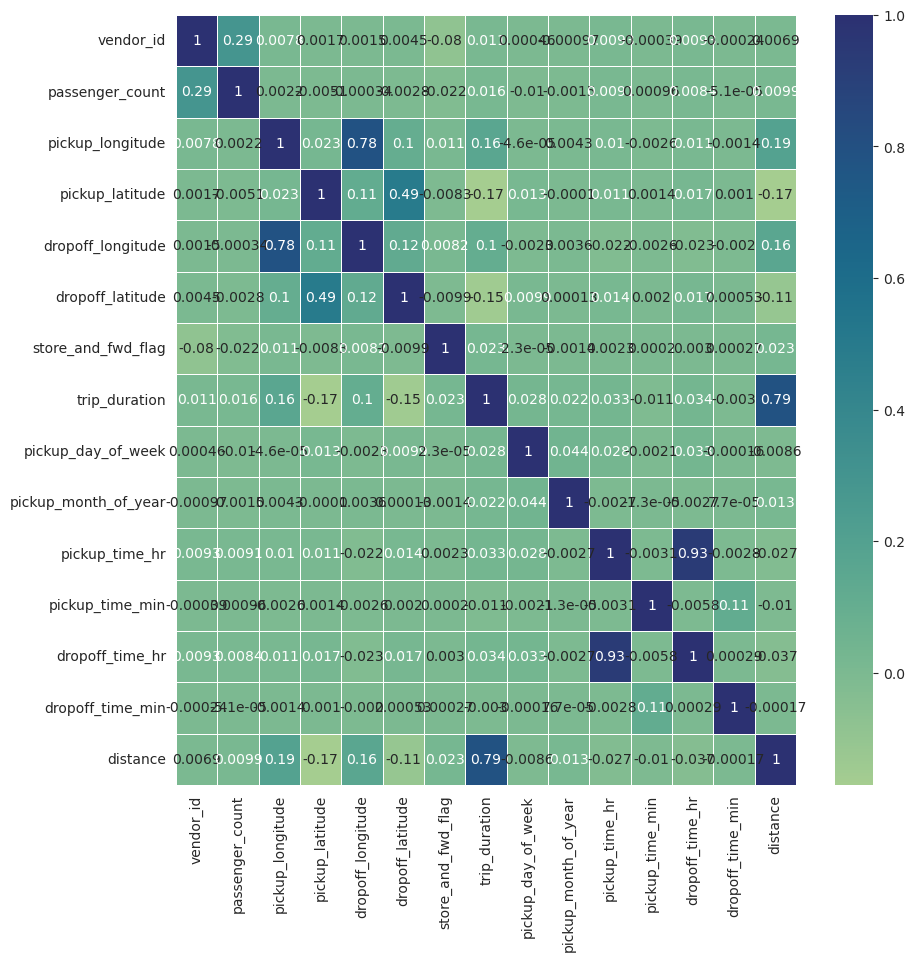

In [223]:
# Correlation between variables in the training set
plot_corr(df_nyc_encoded.drop(['id'], axis=1))

<p>Let's check the correlation between the variables and the target variable:</p>

In [224]:
# Function to plot correlation of variables with the target variable as a barplot
def plot_corr_target(df, target, size=10):
    corr = df.corr()
    corr_target = corr[target]
    corr_target = corr_target.sort_values(ascending=False)
    corr_target = corr_target.drop(target)
    plt.figure(figsize=(size, size))
    corr_target.plot.barh()
    plt.show()

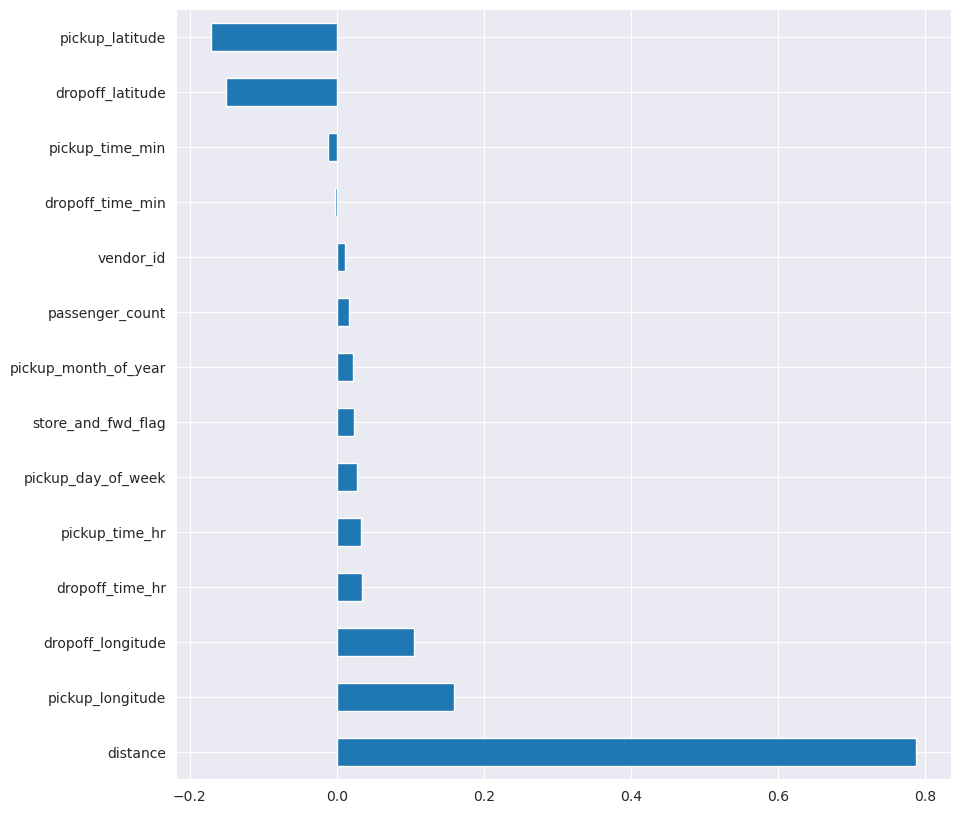

In [225]:
# Check correlation of variables with the target variable
plot_corr_target(df_nyc_encoded.drop(['id'], axis=1), 'trip_duration')

<div class="col-md-8">
    <h3 id="section6">6. Model Building</h3>
    <p>Let's build a model to predict the Survival of passengers on the Titanic:</p>
</div>
<div class="col-md-4">
    <a href="#contents">Back to top</h2>
</div>

In [226]:
# We will first separate the target variable from the features
y = df_nyc_encoded['trip_duration']
x = df_nyc_encoded.drop(['trip_duration', 'id'], axis=1)
x.shape, y.shape

((1458584, 14), (1458584,))

<p>Let's scale the features usinf scikit-learn's MinMax scaler:</p>

In [227]:
## Importing the MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

df_nyc_test_scaled = scaler.fit_transform(df_nyc_test_encoded.drop(['id'], axis=1))

In [228]:
x = pd.DataFrame(x_scaled, columns = x.columns)

df_nyc_test_final = pd.DataFrame(df_nyc_test_scaled, columns = df_nyc_test_encoded.drop(['id'], axis=1).columns)

In [229]:
# Check train data after scaling
x.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pickup_day_of_week,pickup_month_of_year,pickup_time_hr,pickup_time_min,dropoff_time_hr,dropoff_time_min,distance
0,1,0,0.79,0.37,0.79,0.73,0,0.17,0.8,0.74,0.41,0.74,0.54,0.19
1,0,0,0.79,0.36,0.79,0.73,0,0.5,0.6,0,0.73,0,0.92,0.23
2,1,0,0.79,0.37,0.79,0.73,0,0.83,0.4,0.48,0.59,0.52,0.17,0.81
3,1,0,0.79,0.36,0.79,0.73,0,1,0,0.83,0.54,0.83,0.66,0.19
4,1,0,0.79,0.37,0.79,0.73,0,0.33,0.8,0.57,0.51,0.57,0.64,0.15


In [230]:
# Check test data after scaling
df_nyc_test_final.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pickup_day_of_week,pickup_month_of_year,pickup_time_hr,pickup_time_min,distance
0,0,0.14,0.91,0.62,0.88,0.34,0,0.67,0.6,1,1,0.0027
1,0,0.14,0.91,0.61,0.88,0.33,0,0.67,0.6,1,1,0.0027
2,0,0.14,0.91,0.62,0.88,0.34,0,0.67,0.6,1,1,0.0013
3,1,0.14,0.91,0.62,0.88,0.34,0,0.67,0.6,1,1,0.0051
4,0,0.14,0.91,0.62,0.88,0.34,0,0.67,0.6,1,1,0.00093


<p>Now, let's split the dataset into training and test sets:</p>

In [231]:
# Importing the train test split function
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 50, stratify=y)


In [232]:
train_x.shape, train_y.shape, test_x.shape, test_y.shape

((1093938, 14), (1093938,), (364646, 14), (364646,))

<div class="col-md-8">
    <h3 id="section7">7. Model Generation and Evaluation</h3>
    <p>We will use different classification algorithms to build models and evaluate them using F1 score:</p>
    <h4 id="sub_section2_1">i. Ridge Regression</h4>
</div>
<div class="col-md-4">
    <a href="#contents">Back to top</h2>
</div>

In [233]:
# Importing ridge from sklearn's linear_model module
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [234]:
#Set the different values of alpha to be tested
alpha_ridge = [0, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20, 25]

In [238]:
# defining a function which will fit ridge regression model, plot the results, and return the coefficients
def ridge_regression(train_x, train_y, test_x, test_y, alpha):
    #Fit the model
    ridgereg = Ridge(alpha=alpha,normalize=True)
    ridgereg.fit(train_x,train_y)
    train_y_pred = ridgereg.predict(train_x)
    test_y_pred = ridgereg.predict(test_x)

    
    #Return the result in pre-defined format
    msle_train = mean_squared_error(train_y_pred, train_y)
    ret = [np.sqrt(msle_train)]
    
    msle_test = mean_squared_error(test_y_pred, test_y)
    ret.extend([np.sqrt(msle_test)])
    
    ret.extend([ridgereg.intercept_])
    ret.extend(ridgereg.coef_)
    
    return ret

In [239]:
#Initialize the dataframe for storing coefficients.
col = ['rmsle_train','rmsle_test','intercept'] + ['coef_Var_%d'%i for i in range(1,15)]
ind = ['alpha_%.2g'%alpha_ridge[i] for i in range(0,10)]
coef_matrix_ridge = pd.DataFrame(index=ind, columns=col)

In [240]:
#Iterate over the 10 alpha values:
for i in range(10):
    coef_matrix_ridge.iloc[i,] = ridge_regression(train_x, train_y, test_x, test_y, alpha_ridge[i])

In [241]:
#Set the display format to be scientific for ease of analysis
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_ridge

,rmsle_train,rmsle_test,intercept,coef_Var_1,coef_Var_2,coef_Var_3,coef_Var_4,coef_Var_5,coef_Var_6,coef_Var_7,coef_Var_8,coef_Var_9,coef_Var_10,coef_Var_11,coef_Var_12,coef_Var_13,coef_Var_14
alpha_0,3.2e+02,3.2e+02,7.5e+03,3.8,22,3e+04,-1.9e+03,-2.8e+04,-1.1e+04,35,52,16,-67,-5.1,1.7e+02,-5.1,1.4e+03
alpha_1e-08,3.2e+02,3.2e+02,7.5e+03,3.8,22,3e+04,-1.9e+03,-2.8e+04,-1.1e+04,35,52,16,-67,-5.1,1.7e+02,-5.1,1.4e+03
alpha_0.0001,3.2e+02,3.2e+02,7.5e+03,3.8,22,3e+04,-1.9e+03,-2.8e+04,-1.1e+04,35,52,16,-66,-5.1,1.7e+02,-5.1,1.4e+03
alpha_0.001,3.2e+02,3.2e+02,7.4e+03,3.8,22,3e+04,-2e+03,-2.8e+04,-1.1e+04,35,52,16,-65,-5.1,1.7e+02,-5.1,1.4e+03
alpha_0.01,3.2e+02,3.2e+02,7.1e+03,3.8,22,2.9e+04,-2.4e+03,-2.6e+04,-1.1e+04,36,51,16,-50,-5.3,1.6e+02,-5,1.4e+03
alpha_1,3.8e+02,3.8e+02,-4.8e+03,3.9,17,1.6e+04,-1.2e+04,4e+03,-8.2e+03,49,25,12,26,-6.7,34,-1.9,7.1e+02
alpha_5,4.7e+02,4.7e+02,-4.1e+03,1.7,7.5,8e+03,-6.7e+03,4.5e+03,-3.7e+03,24,7.7,4.9,10,-3.1,11,-0.66,2.4e+02
alpha_10,5e+02,5e+02,-2.4e+03,1,4.3,4.8e+03,-4e+03,2.9e+03,-2.2e+03,14,4.1,2.8,5.6,-1.8,5.8,-0.37,1.3e+02
alpha_20,5.1e+02,5.1e+02,-1e+03,0.55,2.3,2.7e+03,-2.2e+03,1.7e+03,-1.2e+03,7.7,2.1,1.5,2.9,-0.98,3,-0.2,69
alpha_25,5.1e+02,5.1e+02,-6.9e+02,0.44,1.9,2.2e+03,-1.8e+03,1.4e+03,-9.7e+02,6.3,1.7,1.2,2.4,-0.8,2.4,-0.16,56


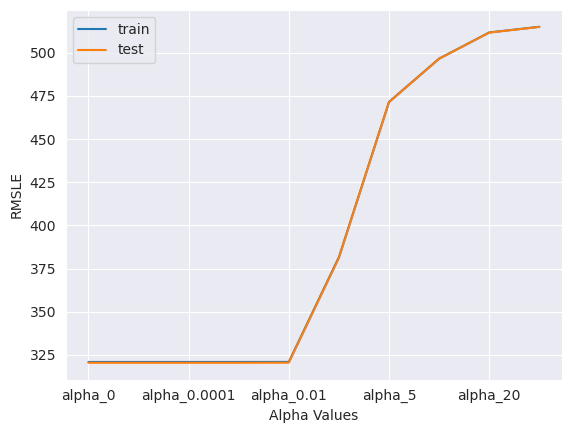

In [242]:
coef_matrix_ridge[['rmsle_train','rmsle_test']].plot()
plt.xlabel('Alpha Values')
plt.ylabel('RMSLE')
plt.legend(['train', 'test'])

In [243]:
#Printing number of zeros in each row of the coefficients dataset
coef_matrix_ridge.apply(lambda x: sum(x.values==0),axis=1)

alpha_0         0
alpha_1e-08     0
alpha_0.0001    0
alpha_0.001     0
alpha_0.01      0
alpha_1         0
alpha_5         0
alpha_10        0
alpha_20        0
alpha_25        0
dtype: int64

In [244]:
from sklearn.feature_selection import RFE

# Create the RFE object and rank each feature
model = Ridge(alpha=1e-8,normalize=True)
rfe = RFE(estimator=model, n_features_to_select=1, step=1)
rfe.fit(x, y)

RFE(estimator=Ridge(alpha=1e-08, normalize=True), n_features_to_select=1)

In [245]:
ranking_df = pd.DataFrame()
ranking_df['Feature_name'] = x.columns
ranking_df['Rank'] = rfe.ranking_

In [246]:
ranked = ranking_df.sort_values(by=['Rank'])
ranked

,Feature_name,Rank
2,pickup_longitude,1
5,dropoff_latitude,2
4,dropoff_longitude,3
13,distance,4
3,pickup_latitude,5
11,dropoff_time_hr,6
9,pickup_time_hr,7
7,pickup_day_of_week,8
6,store_and_fwd_flag,9
1,passenger_count,10


In [259]:
cols = ranked['Feature_name'][:10].values
cols = np.delete(cols, 5)
cols

array(['pickup_longitude', 'dropoff_latitude', 'dropoff_longitude',
       'distance', 'pickup_latitude', 'pickup_time_hr',
       'pickup_day_of_week', 'store_and_fwd_flag', 'passenger_count'],
      dtype=object)

In [260]:
#Fit the model
ridgereg = LinearRegression(normalize=True)
ridgereg.fit(train_x[cols],train_y)
train_y_pred = ridgereg.predict(train_x[cols])
test_y_pred = ridgereg.predict(test_x[cols])


#Return the result in pre-defined format
msle_train = mean_squared_error(train_y_pred, train_y)
rmsle_train = np.sqrt(msle_train)

msle_test = mean_squared_error(test_y_pred, test_y)
rmsle_test = np.sqrt(msle_test)

print('rmse_train:   ', rmsle_train)
print('rmse_test:   ', rmsle_test)

rmse_train:    321.49366058221653
rmse_test:    321.08457519727693


In [265]:
#Fit the model entire train data
ridgereg = Ridge(alpha=1e-8,normalize=True)
ridgereg.fit(x[cols], y)
train_pred = ridgereg.predict(x[cols])
test_pred = ridgereg.predict(df_nyc_test_final[cols])


#Return the result in pre-defined format
msle_train = mean_squared_error(train_pred, y)
rmsle_train = np.sqrt(msle_train)


print('rmse_train:   ', rmsle_train)

rmse_train:    321.3891216040608


In [262]:
df_sample.shape, test_pred.shape

((625134, 2), (625134,))

In [263]:
df_sample['trip_duration'] = test_pred

In [264]:
df_sample.to_csv('submission_nyc_ridge.csv', index=False)